<a href="https://colab.research.google.com/github/moises-rb/Analise_Dados/blob/main/Telecom_X_PrevendoChurn/notebooks/03_Reavaliacao_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🧩 0. Setup Inicial

In [1]:
# Imports essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve

# Configurações estéticas
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


## 🗂️ 1. Carregamento dos dados tratados

In [2]:
# Leitura dos dados tratados (pré-processados no notebook anterior)
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X_PrevendoChurn/dados/dados_tratados_churn.csv'
df = pd.read_csv(url)
df.head()


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.601663,-1.009430,-0.440327,1.035617,1.533025,-0.954296,0.327189,0.828939,0.026652,-0.745607,...,True,False,True,False,False,True,False,False,False,True
1,-0.601663,0.990658,-0.440327,-0.965608,-0.652305,-0.954296,0.327189,-1.206361,-0.162819,-0.768063,...,False,False,False,False,True,False,False,False,False,True
2,1.662059,0.990658,-0.440327,-0.965608,-0.652305,-1.158016,0.327189,0.828939,0.302548,-0.883456,...,False,False,False,False,False,False,False,False,True,False
3,1.662059,0.990658,2.271039,1.035617,-0.652305,-0.791321,0.327189,0.828939,1.103642,-0.461240,...,False,False,True,False,True,False,False,False,True,False
4,1.662059,-1.009430,2.271039,1.035617,-0.652305,-1.198760,0.327189,0.828939,0.634952,-0.889390,...,True,False,True,False,False,False,False,False,False,True


## 🎯 2. Separação das variáveis preditoras e alvo

In [3]:
X = df.drop(columns='Churn')
y = df['Churn']


In [4]:
X.select_dtypes(include='object').columns


Index(['tenure_group'], dtype='object')

## 🧪 3. Aplicação do SMOTE

In [5]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Transformação
X_encoded = pd.get_dummies(X, drop_first=True)

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

# Garantindo que os valores são inteiros
y_train = y_train.astype(int)
y_test = y_test.astype(int)  # opcional, mas mantém tudo coerente

# Aplicação do SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [6]:
print(y_test.shape)
print(y_test.head())

(2110,)
4281    0
1832    0
2402    0
5506    0
1791    0
Name: Churn, dtype: int32


## 🌲 4. Treinamento com Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predições
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

## 🧾 5. Avaliação do Modelo

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1549
           1       0.55      0.59      0.57       561

    accuracy                           0.76      2110
   macro avg       0.70      0.71      0.70      2110
weighted avg       0.77      0.76      0.77      2110



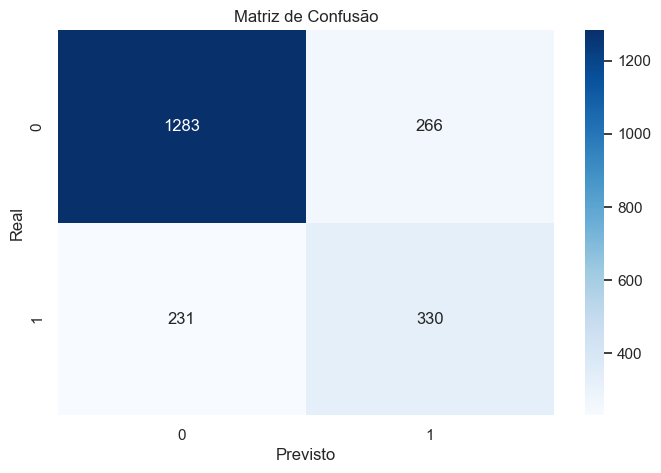

ROC AUC: 0.8155051444839924


In [8]:
# Classification Report
report = classification_report(y_test, y_pred)
print(report)

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# ROC AUC Score
print("ROC AUC:", roc_auc_score(y_test, y_proba))


## ⚖️ 6. Ajuste de Threshold (Opcional)

In [9]:
threshold_custom = 0.3  # ou outro valor que faça sentido após análise
y_pred_custom = (y_proba >= threshold_custom).astype(int)

print("Accuracy com threshold ajustado:", accuracy_score(y_test, y_pred_custom))
print("ROC AUC com threshold ajustado:", roc_auc_score(y_test, y_proba))


Accuracy com threshold ajustado: 0.7033175355450237
ROC AUC com threshold ajustado: 0.8155051444839924


In [10]:
print(y_test.shape)
print(y_test.head())

(2110,)
4281    0
1832    0
2402    0
5506    0
1791    0
Name: Churn, dtype: int32


## 🧠 7. Interpretação do Modelo (Importância das Features)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10556\3893905343.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia_df.head(10), x='Importancia', y='Feature', palette='viridis')


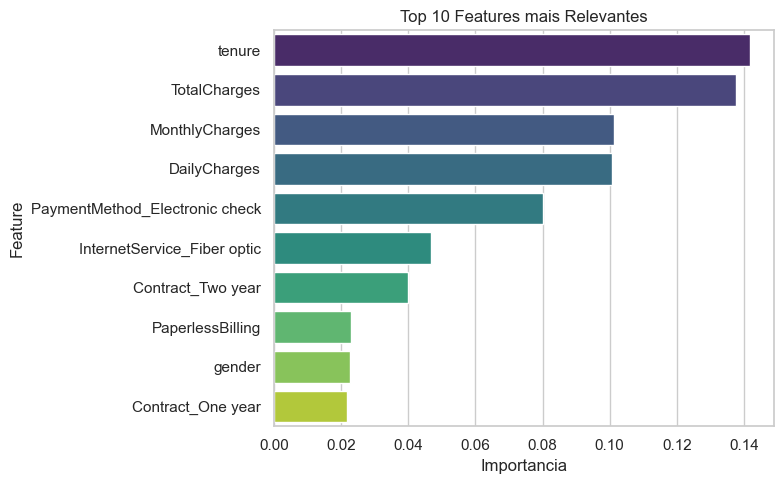

In [11]:
importances = model.feature_importances_

# Use as colunas reais usadas no modelo
features = X_train.columns

importancia_df = pd.DataFrame({'Feature': features, 'Importancia': importances})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Plot
sns.barplot(data=importancia_df.head(10), x='Importancia', y='Feature', palette='viridis')
plt.title("Top 10 Features mais Relevantes")
plt.tight_layout()
plt.show()


## 📤 8. Exportação dos Resultados Finais

In [12]:
# Classification Report
report_final = classification_report(y_test, y_pred, output_dict=True)
df_report_final = pd.DataFrame(report_final).transpose()
df_report_final.to_csv("comparacao_modelos/modelo_final_classification_report.csv", index=True)

# Métricas
final_metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "roc_auc": roc_auc_score(y_test, y_proba)
}
df_metrics_final = pd.DataFrame([final_metrics])
df_metrics_final.to_csv("comparacao_modelos/modelo_final_metrics.csv", index=False)

# Curva ROC
fpr_final, tpr_final, thresholds_final = roc_curve(y_test, y_proba)
roc_df_final = pd.DataFrame({'fpr': fpr_final, 'tpr': tpr_final, 'threshold': thresholds_final})
roc_df_final.to_csv("comparacao_modelos/modelo_final_roc_data.csv", index=False)

print("✅ Resultados exportados com sucesso.")


✅ Resultados exportados com sucesso.


## 📤 9. Importando arquivos gerados nos modelos

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Carregar arquivos
X_test = pd.read_csv('export/X_test.csv')
y_test = pd.read_csv('export/y_test.csv').squeeze()  # Garante que vire uma Series
y_pred_smote = pd.read_csv('export/y_pred_smote.csv').squeeze()
y_proba_smote = pd.read_csv('export/y_proba_smote.csv').squeeze()

In [14]:
# Calcular métricas
acc = accuracy_score(y_test, y_pred_smote)
prec = precision_score(y_test, y_pred_smote)
rec = recall_score(y_test, y_pred_smote)
f1 = f1_score(y_test, y_pred_smote)
roc = roc_auc_score(y_test, y_proba_smote)

In [15]:
# Exibir resultados
print("📊 Desempenho do Modelo com SMOTE + Threshold Ajustado:\n")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC AUC:   {roc:.4f}\n")

📊 Desempenho do Modelo com SMOTE + Threshold Ajustado:

Accuracy:  0.7692
Precision: 0.5535
Recall:    0.6827
F1-score:  0.6113
ROC AUC:   0.8307



In [16]:
# Confusion Matrix
print("🧮 Matriz de Confusão:\n")
print(confusion_matrix(y_test, y_pred_smote))

🧮 Matriz de Confusão:

[[1240  309]
 [ 178  383]]


In [17]:
# Classification Report
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred_smote))


📋 Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1549
           1       0.55      0.68      0.61       561

    accuracy                           0.77      2110
   macro avg       0.71      0.74      0.72      2110
weighted avg       0.79      0.77      0.78      2110



## 🧠 10. Funções para Avaliação com Threshold Ajustável

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve


# Função para ajustar o threshold e calcular métricas
def avaliar_threshold(y_true, y_proba, threshold=0.5):
    y_pred_thr = (y_proba >= threshold).astype(int)

    # Matriz de confusão
    cm = confusion_matrix(y_true, y_pred_thr)

    # Relatório de classificação
    relatorio = classification_report(y_true, y_pred_thr, output_dict=True)

    # AUC
    auc = roc_auc_score(y_true, y_proba)

    # Impressão dos resultados
    print(f"🔧 Threshold: {threshold}")
    print("📊 Matriz de Confusão:")
    print(cm)
    print("\n📋 Classification Report:")
    print(classification_report(y_true, y_pred_thr))
    print(f"🎯 AUC: {auc:.4f}")

    return y_pred_thr

# Plot da Curva ROC
def plotar_roc(y_true, y_proba):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Falso Positivo (FPR)')
    plt.ylabel('Verdadeiro Positivo (TPR)')
    plt.title('Curva ROC')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Plot da Curva Precision x Recall
def plotar_precision_recall(y_true, y_proba):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(thresholds, precisions[:-1], label='Precision')
    plt.plot(thresholds, recalls[:-1], label='Recall')
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title("Precision vs Recall")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


🔧 Threshold: 0.35
📊 Matriz de Confusão:
[[1056  493]
 [  98  463]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1549
           1       0.48      0.83      0.61       561

    accuracy                           0.72      2110
   macro avg       0.70      0.75      0.70      2110
weighted avg       0.80      0.72      0.74      2110

🎯 AUC: 0.8307


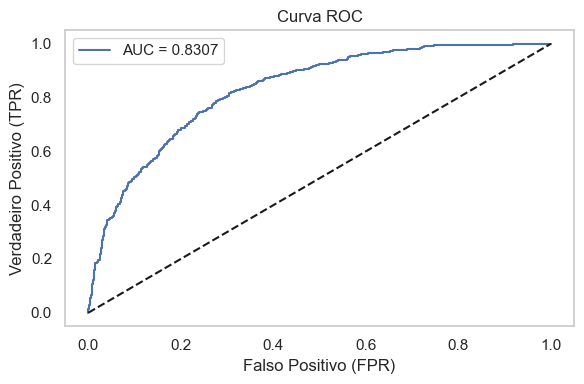

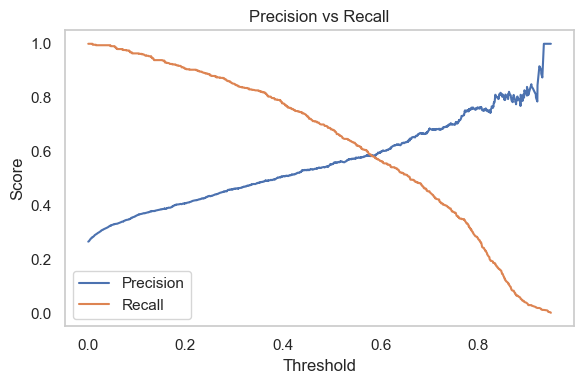

In [19]:
# Avaliação com threshold padrão (0.5)
y_pred_default = avaliar_threshold(y_test, y_proba_smote, threshold=0.35)

# Plot das curvas
plotar_roc(y_test, y_proba_smote)
plotar_precision_recall(y_test, y_proba_smote)


## 🎯 Objetivo
### Encontrar o melhor threshold para o modelo otimizado com SMOTE, balanceando precisão, recall, F1-score, etc., de acordo com os objetivos de negócio.

### 1. Gerar as métricas para diversos thresholds
Vamos testar thresholds entre 0.1 e 0.9 e ver como as métricas se comportam. A ideia é visualizar a evolução da performance do modelo conforme o limiar muda.

In [20]:
thresholds = np.arange(0.1, 0.9, 0.05)
precisions = []
recalls = []
f1s = []
accuracies = []

for threshold in thresholds:
    y_pred_threshold = (y_proba >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred_threshold))
    recalls.append(recall_score(y_test, y_pred_threshold))
    f1s.append(f1_score(y_test, y_pred_threshold))
    accuracies.append(accuracy_score(y_test, y_pred_threshold))

## 2. Plotar os resultados
Para enxergar o “ponto ótimo” visualmente:

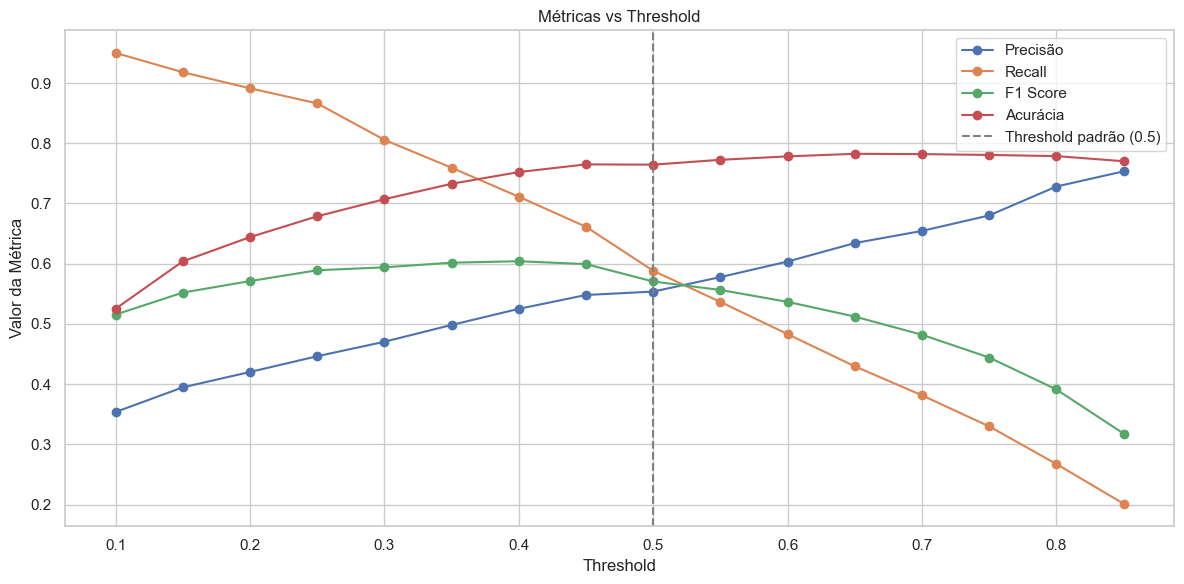

In [21]:
plt.figure(figsize=(12,6))
plt.plot(thresholds, precisions, label='Precisão', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.plot(thresholds, f1s, label='F1 Score', marker='o')
plt.plot(thresholds, accuracies, label='Acurácia', marker='o')
plt.axvline(x=0.5, color='gray', linestyle='--', label='Threshold padrão (0.5)')
plt.title('Métricas vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Valor da Métrica')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Escolher o threshold ideal
Após visualizar os gráficos, você vai escolher qual métrica priorizar:

* Se você quer pegar o maior número possível de clientes propensos a sair (mesmo que erre alguns), foque em Recall.

- Se quer ter mais certeza quando o modelo disser que vai sair, foque em Precisão.

+ Se quer equilíbrio entre precisão e recall, foque em F1-score.


## 4. Aplicar o melhor threshold escolhido
Depois do gráfico, basta definirmos:

In [22]:
melhor_threshold = 0.50  # (exemplo, você decide após o gráfico)

y_pred_final = (y_proba >= melhor_threshold).astype(int)


## Tabela de métricas por threshold

In [23]:
# Lista de thresholds a serem testados
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

In [24]:
# Lista para armazenar os resultados
resultados = []

In [25]:
# Loop pelos thresholds
for t in thresholds:
    y_pred_t = (y_proba_smote >= t).astype(int)

    # Métricas
    acuracia = accuracy_score(y_test, y_pred_t)
    precisao = precision_score(y_test, y_pred_t, zero_division=0)
    recall = recall_score(y_test, y_pred_t, zero_division=0)
    f1 = f1_score(y_test, y_pred_t, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_proba_smote)

    resultados.append({
        'Threshold': t,
        'Acurácia': round(acuracia, 4),
        'Precisão': round(precisao, 4),
        'Recall (Sensibilidade)': round(recall, 4),
        'F1 Score': round(f1, 4),
        'ROC AUC': round(roc_auc, 4)
    })

In [26]:
# Criar DataFrame com os resultados
df_thresholds = pd.DataFrame(resultados)

In [27]:
# Mostrar tabela ordenada por F1 Score (ou qualquer outra métrica)
df_thresholds.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

,Threshold,Acurácia,Precisão,Recall (Sensibilidade),F1 Score,ROC AUC
0,0.4,0.7412,0.5087,0.7790,0.6155,0.8307
1,0.5,0.7692,0.5535,0.6827,0.6113,0.8307
2,0.3,0.6967,0.4618,0.8503,0.5985,0.8307
3,0.6,0.7834,0.5981,0.5651,0.5811,0.8307
4,0.7,0.7991,0.6846,0.4528,0.5451,0.8307


| Threshold | Cenário                                | Interpretação de Negócio                                                                                                                     |
| --------- | -------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------- |
| **0.3**   | **Alta Sensibilidade**                 | Capta quase todos os que vão sair, mas erra mais. Ideal para *retenção agressiva* (ex: campanha de retenção automática ou preventiva).       |
| **0.4**   | **Equilíbrio entre recall e precisão** | Boa sensibilidade sem perder tanto na precisão. Ótimo ponto de partida para negociação.                                                      |
| **0.5**   | **Threshold padrão**                   | Decente, mas perde muito em recall. Talvez não o ideal para churn, já que *deixar escapar é caro*.                                           |
| **0.6**   | **Mais conservador**                   | Melhora a precisão, mas já começa a perder bastante em sensibilidade. Só útil se o custo de atuar for muito alto.                            |
| **0.7**   | **Alta Precisão, Baixo Recall**        | Só atua quando tem quase certeza. Só recomendável se o custo de um falso positivo for absurdamente alto (o que raramente é o caso em churn). |


## Visualizar as métricas comparativas por threshold

In [28]:
# Tabela de métricas por threshold
df_metrics = pd.DataFrame({
    'Threshold': [0.3, 0.4, 0.5, 0.6, 0.7],
    'Accuracy': [0.6967, 0.7412, 0.7692, 0.7834, 0.7991],
    'Precision': [0.4618, 0.5087, 0.5535, 0.5981, 0.6846],
    'Recall': [0.8503, 0.7790, 0.6827, 0.5651, 0.4528],
    'F1 Score': [0.5985, 0.6155, 0.6113, 0.5811, 0.5451],
    'ROC AUC': [0.8307, 0.8307, 0.8307, 0.8307, 0.8307]
})

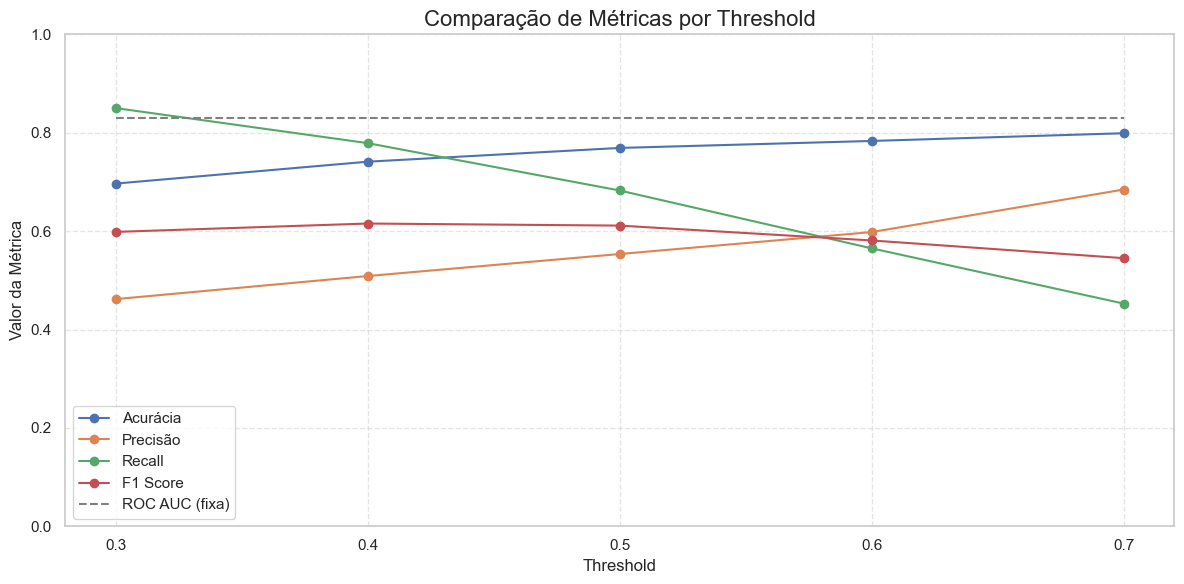

In [29]:
# Configurações do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_metrics['Threshold'], df_metrics['Accuracy'], marker='o', label='Acurácia')
plt.plot(df_metrics['Threshold'], df_metrics['Precision'], marker='o', label='Precisão')
plt.plot(df_metrics['Threshold'], df_metrics['Recall'], marker='o', label='Recall')
plt.plot(df_metrics['Threshold'], df_metrics['F1 Score'], marker='o', label='F1 Score')
plt.plot(df_metrics['Threshold'], df_metrics['ROC AUC'], linestyle='--', color='gray', label='ROC AUC (fixa)')

# Detalhes visuais
plt.title('Comparação de Métricas por Threshold', fontsize=16)
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Valor da Métrica', fontsize=12)
plt.xticks(df_metrics['Threshold'])
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.tight_layout()

plt.show()

In [30]:
import os

def salvar_resultados_modelos_em_csv(
    df_iniciais=None,
    df_ajustados=None,
    df_thresholds=None,
    df_importancias=None,
    pasta_destino='resultados_churn'
):
    """
    Salva os DataFrames fornecidos em arquivos CSV na pasta especificada.
    
    Parâmetros:
    - df_iniciais: DataFrame com os resultados dos modelos antes do SMOTE (opcional)
    - df_ajustados: DataFrame com os resultados dos modelos após o SMOTE e ajuste de threshold (opcional)
    - df_thresholds: DataFrame com as métricas por diferentes thresholds (opcional)
    - df_importancias: DataFrame com a importância das features do modelo final (opcional)
    - pasta_destino: nome da pasta onde os arquivos CSV serão salvos
    """

    os.makedirs(pasta_destino, exist_ok=True)

    if df_iniciais is not None:
        df_iniciais.to_csv(os.path.join(pasta_destino, 'resultados_modelos_iniciais.csv'), index=False)
        print("✔️ Arquivo 'resultados_modelos_iniciais.csv' salvo.")

    if df_ajustados is not None:
        df_ajustados.to_csv(os.path.join(pasta_destino, 'resultados_modelos_ajustados.csv'), index=False)
        print("✔️ Arquivo 'resultados_modelos_ajustados.csv' salvo.")

    if df_thresholds is not None:
        df_thresholds.to_csv(os.path.join(pasta_destino, 'metricas_por_threshold.csv'), index=False)
        print("✔️ Arquivo 'metricas_por_threshold.csv' salvo.")

    if df_importancias is not None:
        df_importancias.to_csv(os.path.join(pasta_destino, 'feature_importance_modelo_final.csv'), index=False)
        print("✔️ Arquivo 'feature_importance_modelo_final.csv' salvo.")

    print(f"\n📁 Todos os arquivos foram salvos na pasta: '{pasta_destino}'")

# Exemplo de uso:
# salvar_resultados_modelos_em_csv(
#     df_iniciais=df_resultados_iniciais,
#     df_ajustados=df_resultados_ajustados,
#     df_thresholds=df_metricas_threshold,
#     df_importancias=df_feature_importance
# )
